# COVID-19 Symptoms Checker Exploration

## Notes
[Data Set Source](https://www.kaggle.com/iamhungundji/covid19-symptoms-checker)   

## Set up

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Reading file
path_to_file = "/content/drive/My Drive/COVID.csv" 

import csv

data = []
with open(path_to_file, mode='r') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',') # csv.DictReader(csv_file)
    for row in csv_reader:
      data.append(row)
# Split title and data
trainingData = data[1:] 
fakeTitle = data[:1]
title = fakeTitle[0]
for i in range(0, 27):
  print(i, title[i])

0 Fever
1 Tiredness
2 Dry-Cough
3 Difficulty-in-Breathing
4 Sore-Throat
5 None_Sympton
6 Pains
7 Nasal-Congestion
8 Runny-Nose
9 Diarrhea
10 None_Experiencing
11 Age_0-9
12 Age_10-19
13 Age_20-24
14 Age_25-59
15 Age_60+
16 Gender_Female
17 Gender_Male
18 Gender_Transgender
19 Severity_Mild
20 Severity_Moderate
21 Severity_None
22 Severity_Severe
23 Contact_Dont-Know
24 Contact_No
25 Contact_Yes
26 Country


In [6]:
# Dimension check
import numpy as np
x = np.array(trainingData)
print(np.shape(x))

(316800, 27)


## Re-integrating the data set

### Integrating age information 

In [7]:
# Integrating age information 
# Age_0-9: 0
# Age_10-19: 0.25
# Age_20-24: 0.5
# Age_25-59: 0.75
# Age_60+: 1
ageColumn = np.zeros((316800,1))
for i in range (0, 316800):
  if x[i][11] == '1':
    ageColumn[i][0] = 0.0
  elif x[i][12] == '1':
    ageColumn[i][0] = 0.25
  elif x[i][13] == '1':
    ageColumn[i][0] = 0.5
  elif x[i][14] == '1':
    ageColumn[i][0] = 0.75
  elif x[i][15] == '1':
    ageColumn[i][0] = 1.0
x = np.append(x, ageColumn, axis=1)
x = np.delete(x,[11, 12, 13, 14, 15],1)
title = np.delete(title,[11, 12, 13, 14, 15])
title = np.append(title, 'Age')
print(title)
print(x[0])

['Fever' 'Tiredness' 'Dry-Cough' 'Difficulty-in-Breathing' 'Sore-Throat'
 'None_Sympton' 'Pains' 'Nasal-Congestion' 'Runny-Nose' 'Diarrhea'
 'None_Experiencing' 'Gender_Female' 'Gender_Male' 'Gender_Transgender'
 'Severity_Mild' 'Severity_Moderate' 'Severity_None' 'Severity_Severe'
 'Contact_Dont-Know' 'Contact_No' 'Contact_Yes' 'Country' 'Age']
['1' '1' '1' '1' '1' '0' '1' '1' '1' '1' '0' '0' '1' '0' '1' '0' '0' '0'
 '0' '0' '1' 'China' '0.0']


### Integrating contact information 

In [8]:
# Contact_Dont-Know: 0.5
# Contact_No: 0
# Contact_Yes: 1
conColumn = np.zeros((316800,1))
for i in range (0, 316800):
  if x[i][18] == '1':
    conColumn[i][0] = 0.5
  elif x[i][19] == '1':
    conColumn[i][0] = 0
  elif x[i][20] == '1':
    conColumn[i][0] = 1
x = np.append(x, conColumn, axis=1)
x = np.delete(x,[18,19,20],1)
title = np.delete(title,[18,19,20])
title = np.append(title, 'Contact')
print(conColumn)
print(title)
print(x[0])

[[1. ]
 [0. ]
 [0.5]
 ...
 [1. ]
 [0. ]
 [0.5]]
['Fever' 'Tiredness' 'Dry-Cough' 'Difficulty-in-Breathing' 'Sore-Throat'
 'None_Sympton' 'Pains' 'Nasal-Congestion' 'Runny-Nose' 'Diarrhea'
 'None_Experiencing' 'Gender_Female' 'Gender_Male' 'Gender_Transgender'
 'Severity_Mild' 'Severity_Moderate' 'Severity_None' 'Severity_Severe'
 'Country' 'Age' 'Contact']
['1' '1' '1' '1' '1' '0' '1' '1' '1' '1' '0' '0' '1' '0' '1' '0' '0' '0'
 'China' '0.0' '1.0']


### Integrating severity information 

In [9]:
# Severity_Mild: 0.33
# Severity_Moderate: 0.66
# Severity_None: 0
# Severity_Severe: 1
sevColumn = np.zeros((316800,1))
for i in range (0, 316800):
  if x[i][14] == '1':
    sevColumn[i][0] = 0.33
  elif x[i][15] == '1':
    sevColumn[i][0] = 0.66
  elif x[i][16] == '1':
    sevColumn[i][0] = 0
  elif x[i][17] == '1':
    sevColumn[i][0] = 1
x = np.append(x, sevColumn, axis=1)
x = np.delete(x,[14,15,16,17],1)
title = np.delete(title,[14,15,16,17])
title = np.append(title, 'Severity')
print(title)
print(x[0])

['Fever' 'Tiredness' 'Dry-Cough' 'Difficulty-in-Breathing' 'Sore-Throat'
 'None_Sympton' 'Pains' 'Nasal-Congestion' 'Runny-Nose' 'Diarrhea'
 'None_Experiencing' 'Gender_Female' 'Gender_Male' 'Gender_Transgender'
 'Country' 'Age' 'Contact' 'Severity']
['1' '1' '1' '1' '1' '0' '1' '1' '1' '1' '0' '0' '1' '0' 'China' '0.0'
 '1.0' '0.33']


In [10]:
# Delete Country Info 
# (because it's NaN)
x = np.delete(x,14,1)
title = np.delete(title,14)
for i in range(0, 17):
  print(i, title[i])

0 Fever
1 Tiredness
2 Dry-Cough
3 Difficulty-in-Breathing
4 Sore-Throat
5 None_Sympton
6 Pains
7 Nasal-Congestion
8 Runny-Nose
9 Diarrhea
10 None_Experiencing
11 Gender_Female
12 Gender_Male
13 Gender_Transgender
14 Age
15 Contact
16 Severity


## Shuffling & Splitting the data set 

In [11]:
np.random.shuffle(x)
trainingSet = x[:1000]
testingSet = x[1000:]
print(np.shape(trainingSet))

(1000, 17)


In [12]:
# A bunch of imports 
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torch.optim as optim
from tqdm import tqdm_notebook

In [13]:
trainingInput = trainingSet[:,:16]
trainingOutput = trainingSet[:,16]
trainingInput = trainingInput.astype(np.float)
trainingOutput = trainingOutput.astype(np.float)
trainingOutput = torch.from_numpy(trainingOutput).float().reshape(-1,1)
print(np.shape(trainingOutput))
print(np.shape(trainingInput))

torch.Size([1000, 1])
(1000, 16)


## Actual Experiment

In [14]:
trainingFeatureNames = title[:-1] # TODO: Are we ending on index 12?
inData = {}
for i, feature in enumerate(trainingFeatureNames):
  inData[i] = torch.from_numpy(trainingInput[:,i]).float().reshape(-1,1) # Can do by feature name or index

print(np.shape(inData[0]))

torch.Size([1000, 1])


In [15]:
# Create Net class
class Net(nn.Module):
  def __init__(self, layerWidth=300):
    super(Net, self).__init__();
    self.fc1 = nn.Linear(1, layerWidth)
    nn.init.kaiming_normal_(self.fc1.weight)
    self.fc2 = nn.Linear(layerWidth, layerWidth)
    nn.init.kaiming_normal_(self.fc2.weight)
    self.fc3 = nn.Linear(layerWidth, layerWidth)
    nn.init.kaiming_normal_(self.fc3.weight)
    self.fc4 = nn.Linear(layerWidth,1)
    nn.init.kaiming_normal_(self.fc4.weight)
  def forward (self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.fc4(x)
    return x

In [16]:
nets = []
for i in range(16):
  nets.append( Net() )

In [17]:
import torch.optim as optim
from tqdm import tqdm_notebook

optimizers = [optim.Adam(nets[i].parameters()) for i in range(len(nets))]

epochs = tqdm_notebook(range(1500))
criterion = nn.MSELoss()
for epoch in epochs:
  for optimizer in optimizers:
    optimizer.zero_grad()

  outputs = [nets[i](inData[i]) for i in range(len(nets))]

  totalOut = sum(outputs) # TODO: Check that this works.
  loss = criterion(totalOut,trainingOutput)
  loss.backward()

  for optimizer in optimizers:
    optimizer.step()

  epochs.set_description(str(loss.data.item()))

print(loss.data.item())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  



0.13854192197322845


## Plots

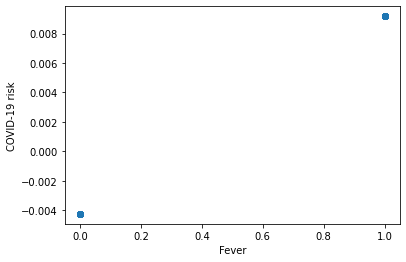

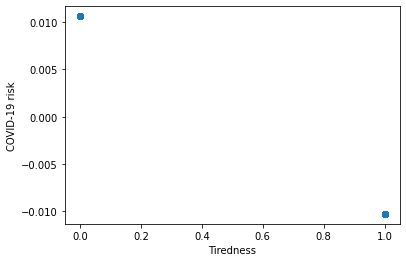

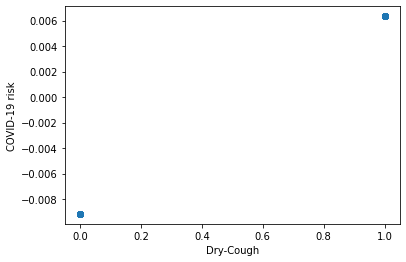

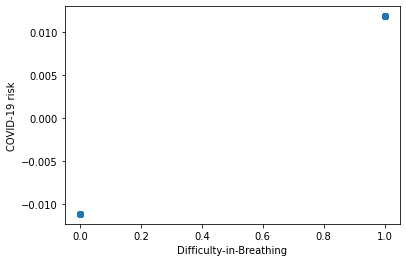

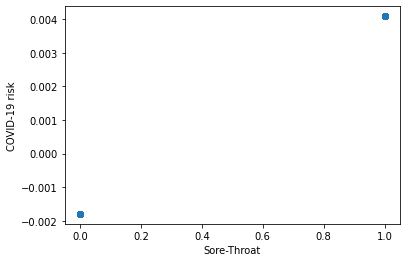

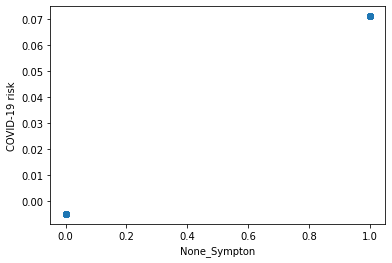

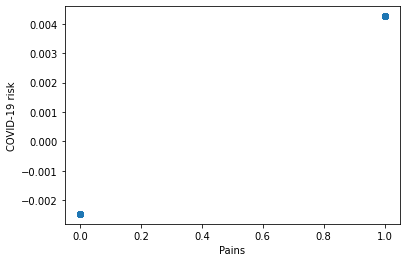

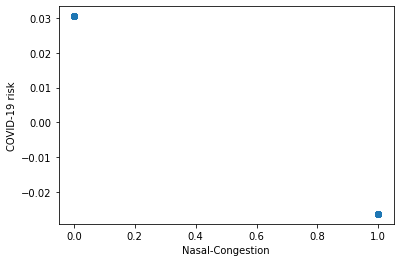

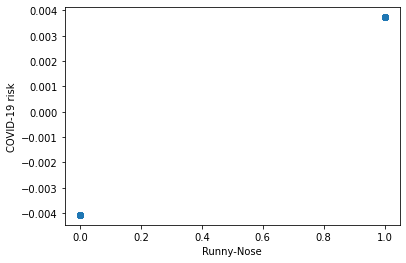

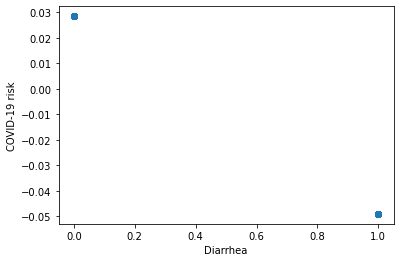

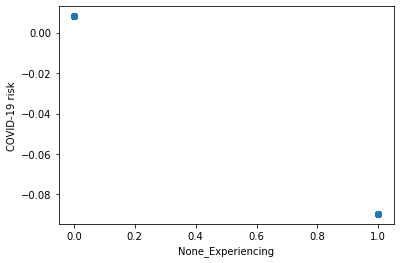

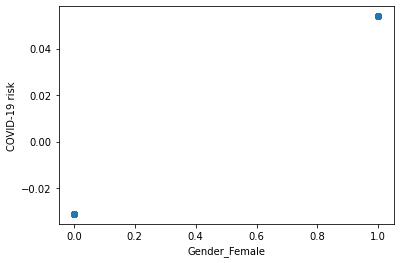

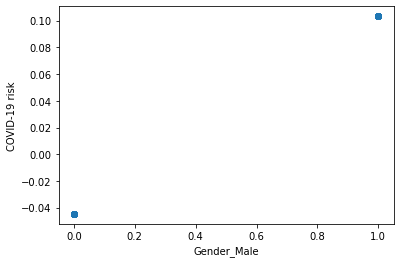

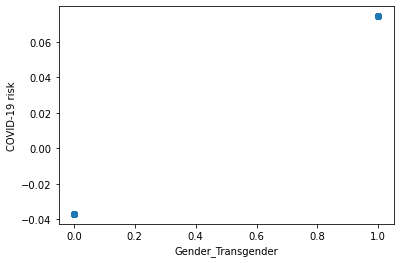

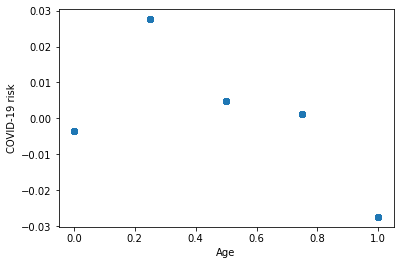

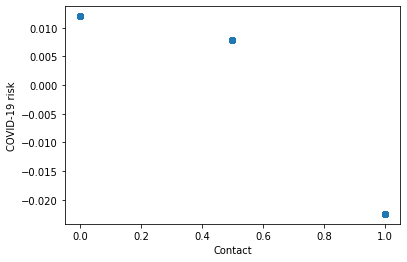

0.5035694465041161


In [24]:
def plotFeatureFunction(featureIndex):
  newOutput = outputs[featureIndex].detach().numpy()
  # newOutput = newOutput - (np.max(newOutput) + np.min(newOutput))/2
  meanOutput = np.mean(newOutput)
  newOutput = newOutput - meanOutput
  plt.scatter(inData[featureIndex], newOutput)
  plt.xlabel(trainingFeatureNames[featureIndex])
  plt.ylabel("COVID-19 risk")
  plt.show()
  return meanOutput

scoreOffSet = 0

for i in range(len(nets)):
  # plotFeatureFunction(i)
  scoreOffSet = scoreOffSet + plotFeatureFunction(i)
print(scoreOffSet)

## Testing

In [25]:
testingSet = testingSet[:400]
testingInput = testingSet[:,:16]
testingOutput = testingSet[:,16]
testingInput = testingInput.astype(np.float)
testingOutput = testingOutput.astype(np.float)
trainingFeatureNames = title[:-1] # TODO: Are we ending on index 12?
testData = {}
for i, feature in enumerate(trainingFeatureNames):
  testData[i] = torch.from_numpy(testingInput[:,i]).float().reshape(-1,1) # Can do by feature name or index

print(np.shape(testData[15]))

torch.Size([400, 1])


In [26]:
def mapResult(num):
  sev = [0, 0.33, 0.66, 1]
  finalResult = 9999;
  holder = 0;
  for i in sev:
    if (abs(num - i) < finalResult):
      finalResult = abs(num - i)
      holder = i
  return holder
mapFunc = np.vectorize(mapResult)

In [27]:
totalOutNp = totalOut.detach().numpy()

mappedOut = mapFunc(totalOutNp)

trainingOutputNp = trainingOutput.detach().numpy()
trainingOutputNp = np.around(trainingOutputNp, decimals=2)
print(np.column_stack((totalOutNp,mappedOut, trainingOutputNp)))
totalCorrect = 0
totalPoints =  trainingOutputNp.size
for i in range(totalPoints):
  if(mappedOut[i] == trainingOutputNp[i]):
    totalCorrect += 1
print(totalCorrect/totalPoints)

ValueError: ignored

## Testing Accuracy

In [28]:
prediction = [nets[i](testData[i]) for i in range(len(nets))]
totalOut = sum(prediction)

In [29]:
totalOutNp = totalOut.detach().numpy()
totalOutNp = totalOutNp - 0.5
finalOut = np.ceil(totalOutNp).astype(np.int)
# testingOutputNp = testingOutput.detach().numpy()
totalCorrect = 0
totalPoints = totalOutNp.size
for i in range(totalPoints):
  if(finalOut[i] == testingOutput[i]):
    totalCorrect += 1
print(totalCorrect/totalPoints)

0.2775
